<a href="https://colab.research.google.com/github/Prasannark48/Cardiovascular-risk-prediction---ML-Capstone-Project-2/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels.
It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots.
There are many different types of CVD. one of the main type is Coronary heart disease(CHD).
Coronary heart disease occurs when the flow of oxygen-rich blood to the heart muscle is blocked or reduced.

The given dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. 
Variables 
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors. 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 571 kB 12.0 MB/s 


#### Mounting the drive

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Projects/Cardiovascular risk prediction/data_cardiovascular_risk.csv',index_col = "id")


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 16)

There are 3390 rows and 16 columns present in the dataset.

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

So, No duplicate values we found from the given dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()


age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

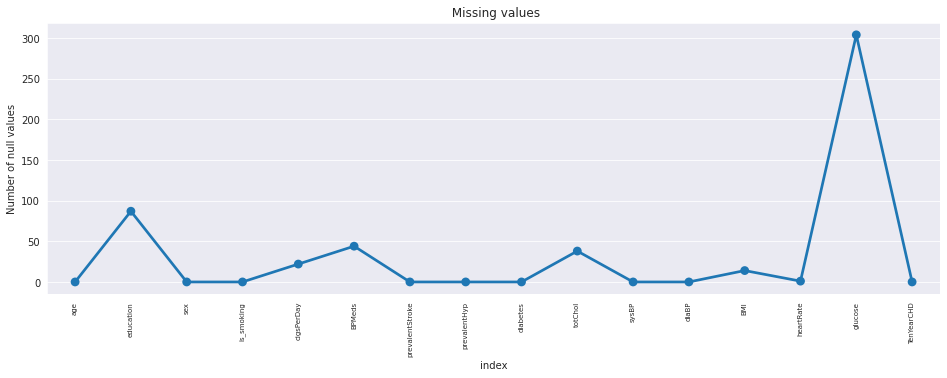

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame(df.isnull().sum()).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title(" Missing values")
plt.ylabel("Number of null values")
plt.show()
 
 

### What did you know about your dataset?

The given dataset has total 3390 rows and 16 columns with both numerical and categorical features found. No duplicate values and many missing values we found from various features.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Id and index column values are same. so, just think id coulmn as a index

In [ ]:
# Dataset Describe
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

There are both numerical and categorical features present in the dataset.

Demographic: 

• Sex: male or female("M" or "F") 

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

Behavioral 
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

Medical( history) 
• BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

• Diabetes: whether or not the patient had diabetes (Nominal) 

Medical(current) 

• Tot Chol: total cholesterol level (Continuous) 

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 

Predict variable (desired target) 

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

We can also see the mean, max,min,standard deviation of all the features.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [4]:
# Write your code to make your dataset analysis ready.
df_crp=df.copy()
# Checking Shape of True Value
print("No. of patients have future coronary heart disease  : -",len(df_crp[df_crp['TenYearCHD']==True]))
# Assigning churn customers data to variable df_churn
df_crp1=df_crp[(df_crp['TenYearCHD']==True)]

No. of patients have future coronary heart disease  : - 511


In [5]:
# TenyearCHD  groupby education Wise
pd.DataFrame(df_crp.groupby('education')['TenYearCHD'].value_counts().reset_index(name="Count"))

,education,TenYearCHD,Count
0,1.0,0,1135
1,1.0,1,256
2,2.0,0,872
3,2.0,1,118
4,3.0,0,479
5,3.0,1,70
6,4.0,0,319
7,4.0,1,54


In [6]:
# Getting Unique ages
print(df_crp['age'].unique())
print(" ")
# Getting Unique ages Count
print("Unique ages Count is ",df_crp['age'].nunique(),".")

[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
 
Unique ages Count is  39 .


In [7]:
pd.DataFrame(df_crp.groupby('age')['TenYearCHD'].value_counts().reset_index(name="Count"))

,age,TenYearCHD,Count
0,32,0,1
1,33,0,4
2,34,0,16
3,35,0,27
4,35,1,2
...,...,...,...
70,68,1,7
71,69,0,4
72,69,1,1
73,70,0,1


### What all manipulations have you done and insights you found?

Reshaping the data of sex and the education column does not make any sense in this dataset so just droped.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

0    2879
1     511
Name: TenYearCHD, dtype: int64
 


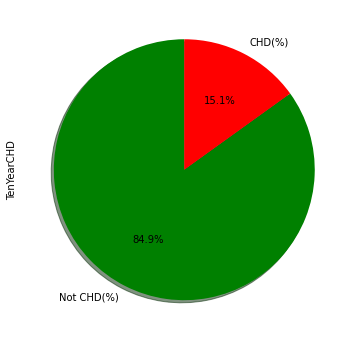

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df.TenYearCHD.value_counts())
print(" ")
df['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not CHD(%)','CHD(%)'],
                               colors=['green','red'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in our data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From above pie chart we get over 85% of patients  has not having 10-year risk of future coronary heart disease (CHD) and 15% of patients has 10-year risk.It means 511 patients are in danger.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Cardiovascular disease is the leading cause of death worldwide and a major public health concern. Therefore, its risk assessment is crucial to many existing treatment guidelines.We can see that the dependent variable gives an idea about patient will have 10-year future risk or not.

#### Chart - 2

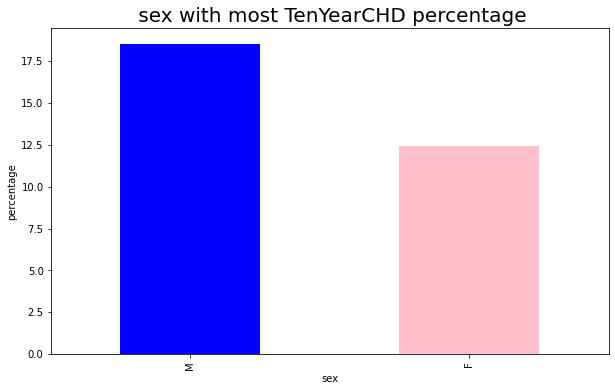

In [ ]:
# Chart - 2 visualization code
plt.rcParams['figure.figsize'] = (10, 6)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['sex'])['TenYearCHD'].mean())*100).sort_values(ascending = False).plot.bar(color = ['blue','pink'])
plt.title(" sex with most TenYearCHD percentage", fontsize = 20)
plt.xlabel('sex', fontsize = 10)
plt.ylabel('percentage', fontsize = 10)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the TenYearCHD with respect to sex, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

We can able to see that most of the patients having 10-year risk of CHD are males. Around 18% of males having risk and 12% of females has 10-year futur risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here, Males are a major sex factor which tells how much percentage of patients has a 10-year risk.This factor impacting positively.

#### Chart - 3

[Text(0.5, 1.0, 'age group vs tenyearchd ')]

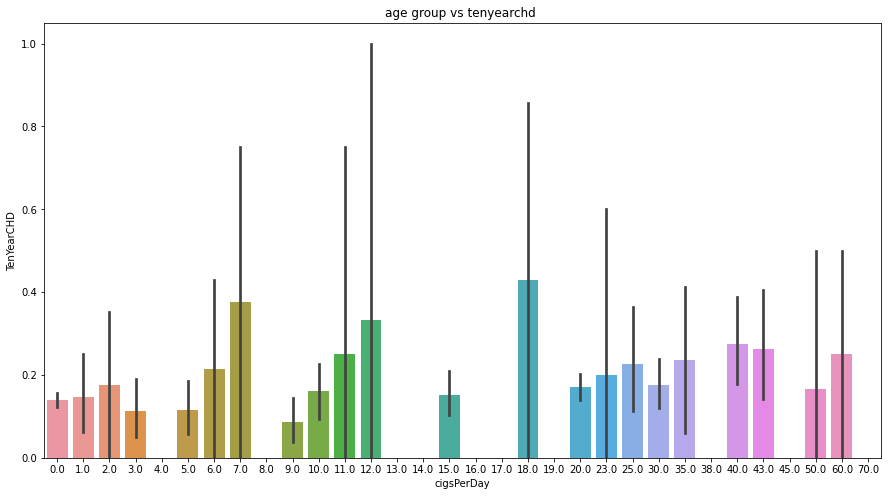

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='cigsPerDay',y='TenYearCHD',ax=ax)
ax.set(title='age group vs tenyearchd ')

[Text(0.5, 1.0, 'age group vs tenyearchd ')]

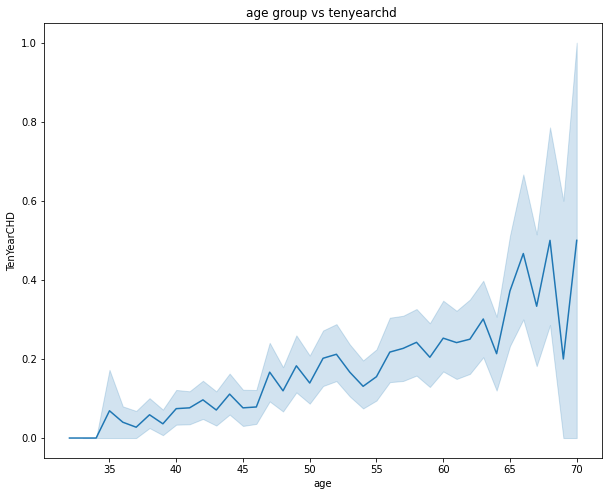

In [ ]:
# Chart - 3 visualization code
# age group vs tenyearchdpercantage visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(data=df,x='age',y='TenYearCHD',ax=ax)
ax.set(title='age group vs tenyearchd ')

##### 1. Why did you pick the specific chart?

Seaborn Line Plots depict the relationship between continuous as well as categorical values in a continuous data point format.SO, Here age is a continuous feature. So, I used line plot and which helped me to get the percentage comparision of the age group.

##### 2. What is/are the insight(s) found from the chart?

From above line plot we getting most of the patients of age 45-55 chance of having 10-year risk of CHD are initiated because, after adult age people smoking in higher rate due to pressure of various family and work problems as a result high bp and high cholestrol can be seen.After the age from 65-70 getting a risk is very high.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As age increases the chance of having 10-year risk of future CHD also increases. This will make age creating positive growth on dependent variable.

#### Chart - 4

[Text(0.5, 1.0, 'TenYearCHD acording to is_smoking ')]

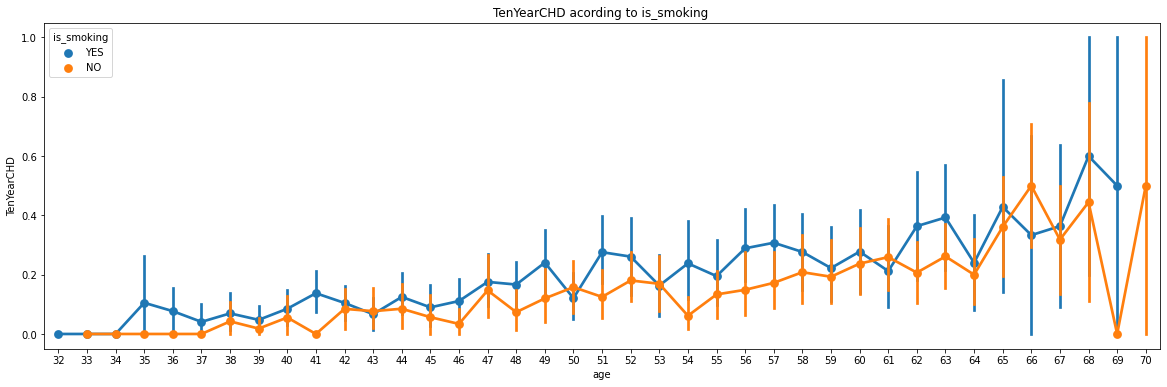

In [ ]:
# Chart - 4 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,6))
sns.pointplot(data=df,x='age',y='TenYearCHD',hue='is_smoking',ax=ax)
ax.set(title='TenYearCHD acording to is_smoking ')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

Here, we get between 45-60 of age patients who are smoking getting a chance of 10-year risk of future CHD are high. After age of 60 we are getting some error or outliers in the dataset. So, that's the reason lot of deviations can be observed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Patients who are smoking impacting more on the dependent variable which leads to positive growth on TenYearCHD with respect to age. 32-35 age people are not smoking so we are not finding any percentage of future risk of CHD.

#### Chart - 5

[Text(0.5, 1.0, ' diabetes v/s TenYearCHD ')]

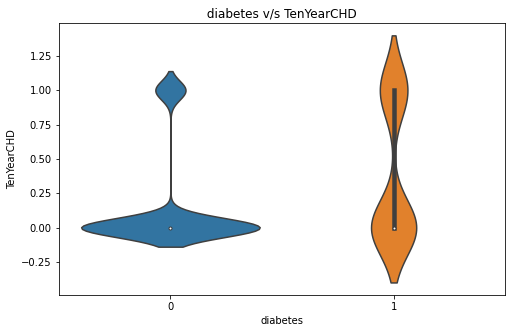

In [ ]:
# Chart - 5 visualization code
# violin Plot for  attribute
fig,ax=plt.subplots(figsize=(8,5))
sns.violinplot(data=df,x='diabetes',y='TenYearCHD',ax=ax)
ax.set(title=' diabetes v/s TenYearCHD ')

##### 1. Why did you pick the specific chart?

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) numerical and categorical variables such that those distributions can be compared. So, I used violin plot and which helped me to get the diabetes patients who are vulnerable to a future risk of CHD.

##### 2. What is/are the insight(s) found from the chart?

Patients who are having diabetes are more vulnerable to the 10-year future risk. Very less number of patients who dont have diabetes are not in a risk.We can also see lot of outliers or errors present in this feature.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Diabetes feature giving clear view of 10-year risk  and insights. As diabetes patients increases the tenyrarrisk also increasing this lead to positive growth on the dependent variable. There is a drop in chance of getting a risk for who dont have diabetes.High blood glucose from diabetes can damage our blood vessels and the nerves that control our heart and blood vessels. Over time, this damage can lead to heart disease. People with diabetes tend to develop heart disease at a younger age than people without diabetes.

#### Chart - 6

In [ ]:
#converting float type to int type for future analysis.
df['sysBP'].astype(int)
df['diaBP'].astype(int)

id
0        85
1        98
2        71
3        88
4        85
       ... 
3385     79
3386     56
3387    119
3388    105
3389     77
Name: diaBP, Length: 3390, dtype: int64

In [ ]:
bp = ['sysBP','diaBP'] #adding both columns to one variable

In [ ]:
##making a different types of blood pressure
Normal_bp =	((df['sysBP'] >= 120 ) & (df['sysBP'] <= 129)) & ((df['diaBP'] >= 80 ) & (df['diaBP'] <= 84))
High_normal_bp = ((df['sysBP'] >= 130 ) & (df['sysBP'] <= 139)) & ((df['diaBP'] >= 85 ) & (df['diaBP'] <= 89))
Grade_1_hypertension= ((df['sysBP'] >= 140 ) & (df['sysBP'] <= 159)) & ((df['diaBP'] >= 90 ) & (df['diaBP'] <= 99)) 
print(f'Normal BP Patints are: {Normal_bp.value_counts()}')
print(f'High normal BP Patints are: {High_normal_bp.value_counts()}')
print(f'Grade 1 hypertension Patients : {Grade_1_hypertension.value_counts()}')

Normal BP Patints are: False    3158
True      232
dtype: int64
High normal BP Patints are: False    3218
True      172
dtype: int64
Grade 1 hypertension Patients : False    3140
True      250
dtype: int64


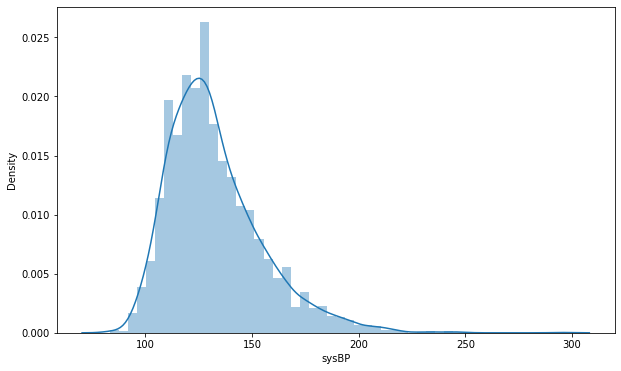

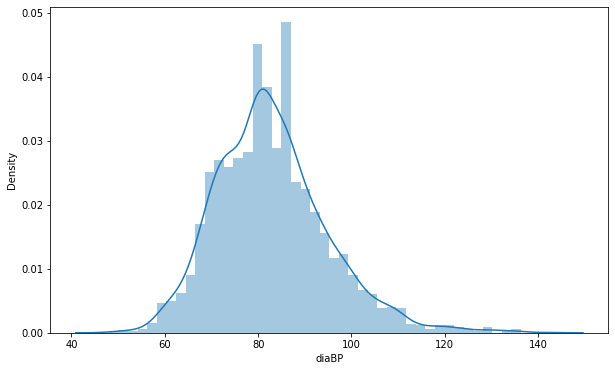

In [ ]:
#Visualization of sysbp and diabp
for col in bp:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it.So, I used dist plot and which helped me to get the sysbp and diabp patients who are vulnerable to a future risk of CHD.



##### 2. What is/are the insight(s) found from the chart?

Over the years, research has found that both numbers are equally important in monitoring heart health. However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we seen systolicbp giving positive correlation with disease.more than 150 systolic bp are prone to disease.But for diastolic bp some are diverted and not showing greater impact on disease.

#### Chart - 7

In [ ]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


[Text(0.5, 1.0, 'prevalentStroke vs TenYearCHD ')]

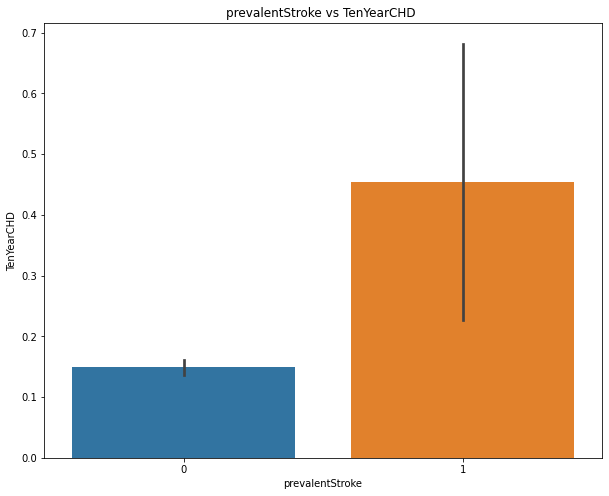

In [ ]:
# Chart - 7 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='prevalentStroke',y='TenYearCHD',ax=ax)
ax.set(title='prevalentStroke vs TenYearCHD ')


##### 1. Why did you pick the specific chart?

Bar chart gives best view for numerical features. Here, I used for prevalentstroke with repect to heart disease.

##### 2. What is/are the insight(s) found from the chart?

As we can see a person who had a stroke earlier more prone to CHD. So, the patients are in danger zone who had previous stroke and it is advisable to take proper treatment to get cure for such attacks in future.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

People who had experienced a stroke earlier are postively correlated with the heart disease. Very less number of patients we can find negative growth those who doesn't have any experience of stroke earlier.

#### Chart - 8

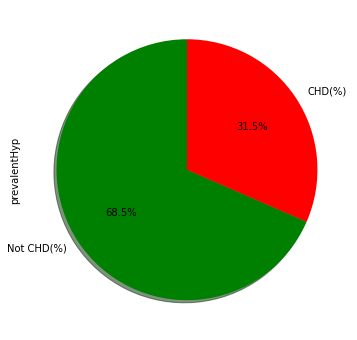

In [ ]:
# Chart - 8 visualization code
df['prevalentHyp'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not CHD(%)','CHD(%)'],
                               colors=['green','red'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. The slices of pie are called wedges.So, I used piechart and which helped me to get the prevalenthyp patients who are vulnerable to a future risk of CHD.

##### 2. What is/are the insight(s) found from the chart?

We can able to see over 32% of patients are prone to future heart disease who had prevalent hypertension and 69% of people who has hypertension are not much vulnerable to disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A small postive impact on the disease by prevalent hypertension. So, taking proper treatment and meditation can reduce the prevalent hypertension so that we can reduce the number of patients getting a risk in future.

#### Chart - 9

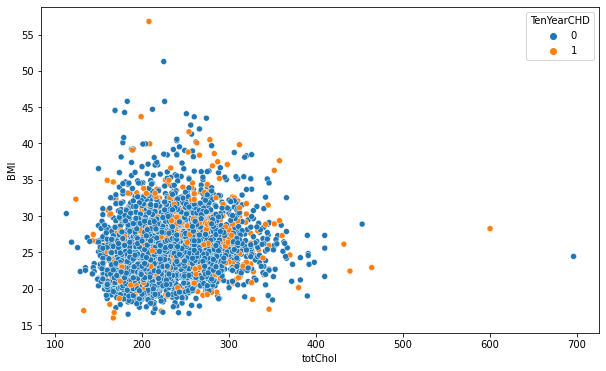

In [ ]:
# Chart - 9 visualization code
sns.scatterplot(x="totChol", y="BMI", hue="TenYearCHD", data=df)

##### 1. Why did you pick the specific chart?

A scatter plot displays data between two continuous data. It shows how one data variable affects the other variable. A scatter plot can display data in different types of plots, both 2D and 3D. Here, Both BMI and totalchol are continuous values so this plot suites to make data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can find BMI of more than 30.0 or 35.0 are more prone to heart disease. The cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A high body mass index (BMI) is associated with an increased risk of mortality from coronary heart disease (CHD). However, a low BMI may also be associated with an increased mortality risk. The orange color dots indicates the patients are prone to disease and Blue color dots indicates patients are not prone to disease.

#### Chart - 10

In [ ]:
##creating function for different levels of heartrate
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value
     

In [ ]:
df['heartRateLabel'] = df.apply(heartRate_data, axis = 1)#adding new column to a dataframe.

In [ ]:
df['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of id
0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
3385    Normal
3386    Normal
3387    Normal
3388    Normal
3389    Normal
Name: heartRateLabel, Length: 3390, dtype: object>

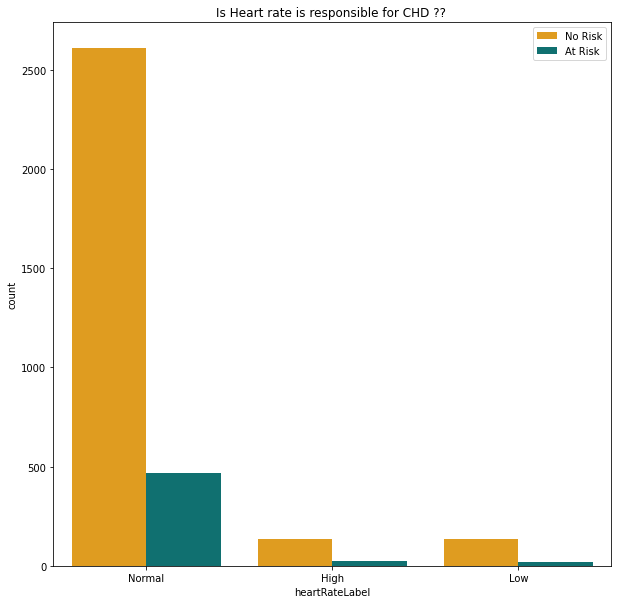

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['heartRateLabel'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart (aka bar graph, column chart) plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar's value. so, i used to create 3 different levels of heartrate levels.

##### 2. What is/are the insight(s) found from the chart?

As we can see there is a long gap between normal risk and normal not risk patients. so, we can say there is a very less chance for getting a disease.But, for high and low level of heart rate the difference between not risk and at risk is very less and we can conclude that these patients are prone to heart disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The combination of hypertension and high heart rate may induce atherosclerotic lesions and the development of stroke and CHD. So, low and high rate of hearte rate will lead to stroke.

#### Chart - 11

[Text(0.5, 1.0, 'glucose vs TenYearCHD ')]

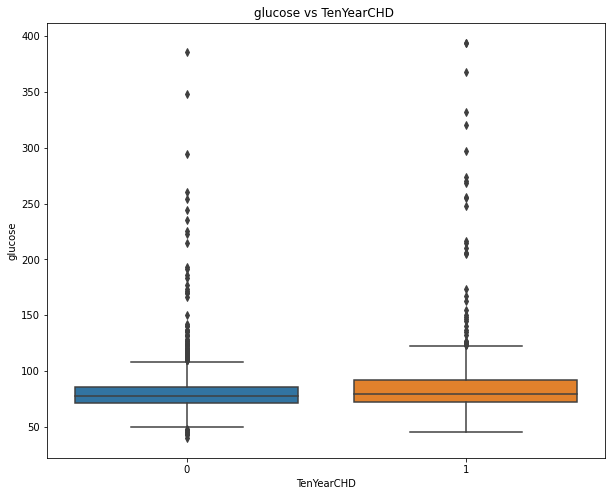

In [ ]:
# Chart - 11 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x='TenYearCHD',y='glucose',ax=ax)
ax.set(title='glucose vs TenYearCHD ')

##### 1. Why did you pick the specific chart?

The seaborn boxplot is a very basic plot Boxplots are used to visualize distributions. Thats very useful when you want to compare data between two groups. Sometimes a boxplot is named a box-and-whisker plot. Any box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.S , I used for to view the data of glucose levels.

##### 2. What is/are the insight(s) found from the chart?

We can able to see a lot many outliers are present in this feature dataset. So high blood glucose levels can damage the body's organs. Possible long-term effects include damage to large (macrovascular) and small (microvascular) blood vessels, which can lead to heart attack, stroke, and problems with the kidneys, eyes, gums, feet and nerves. More than 120 glucose level lead to severe heart attack.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A fasting blood glucose level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.So, As glucose level increases there is a possibility of getting heart disease also increases.

#### Chart - 12

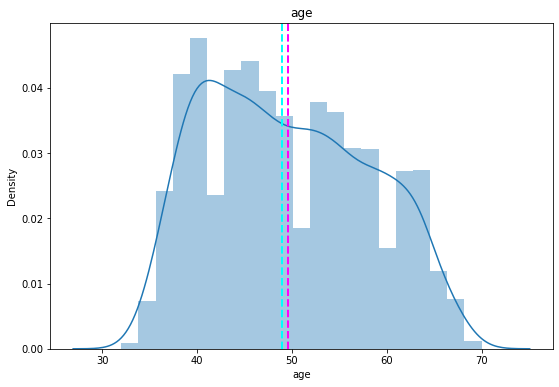

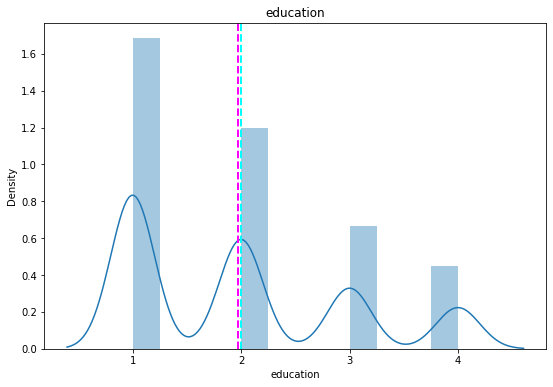

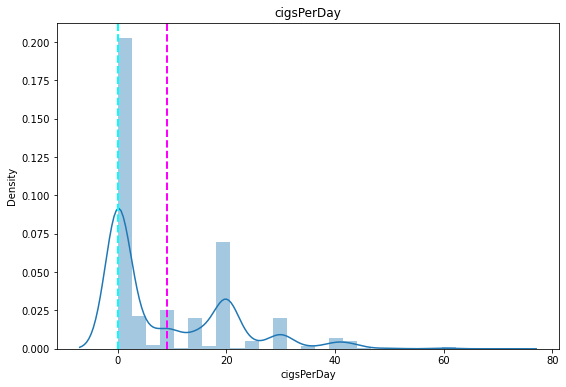

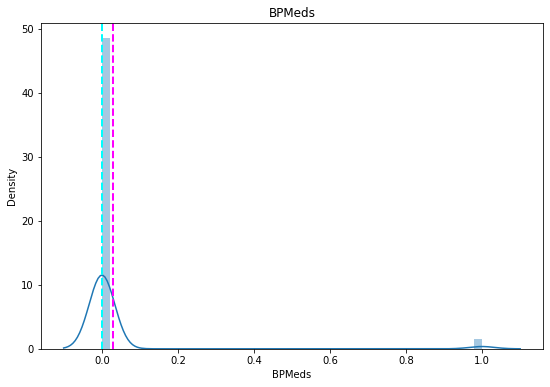

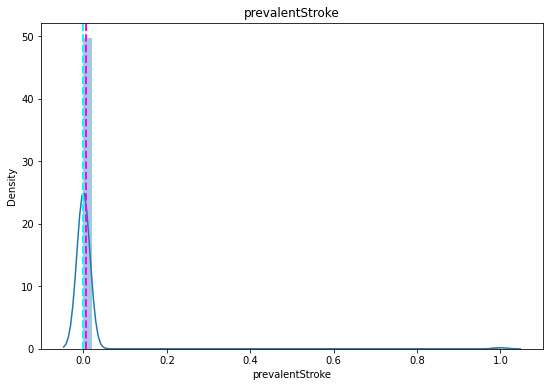

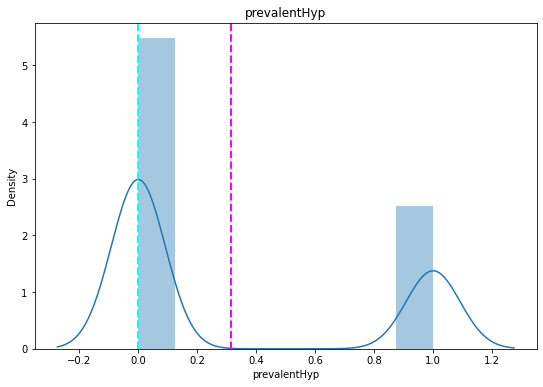

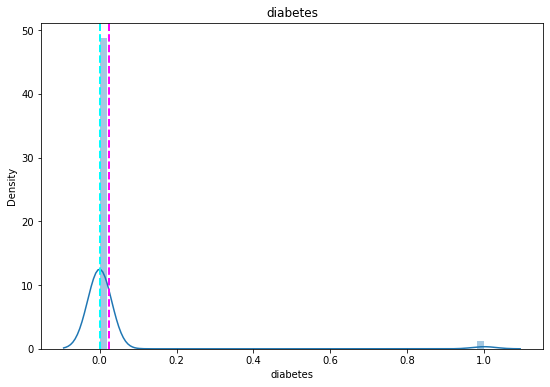

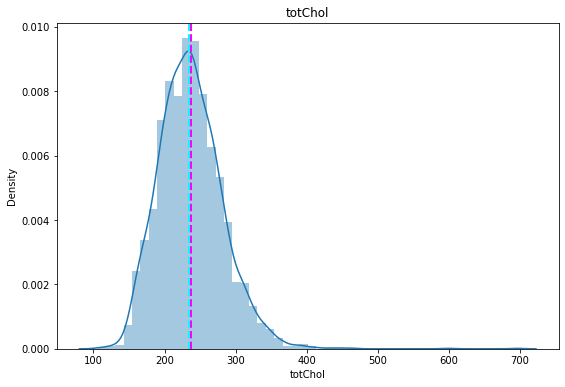

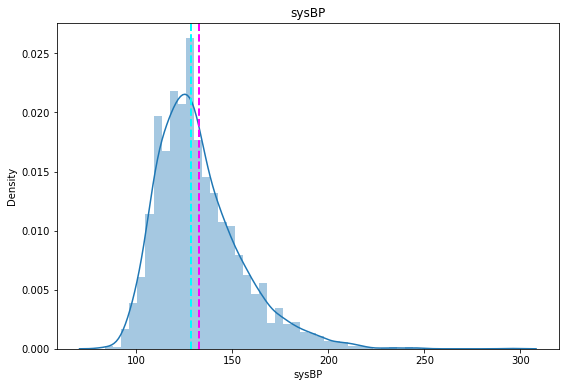

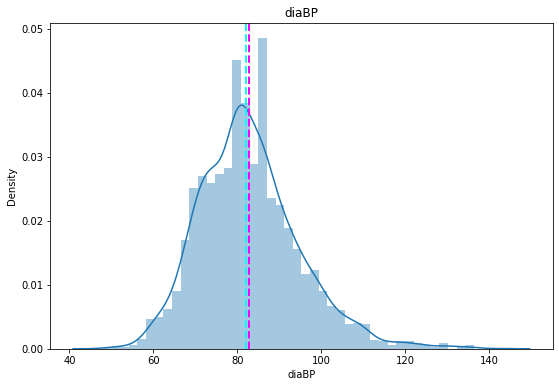

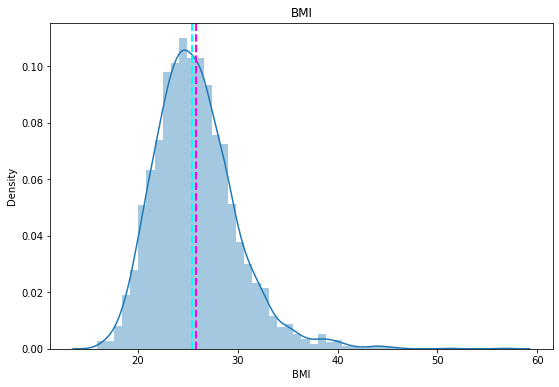

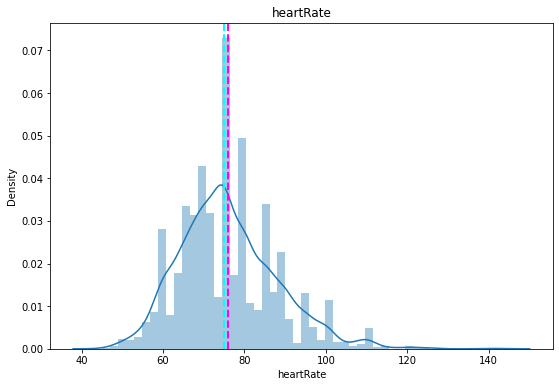

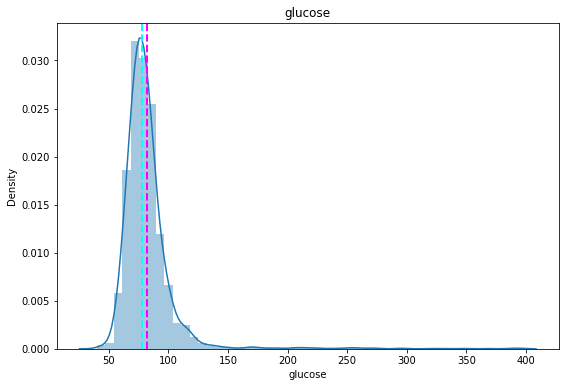

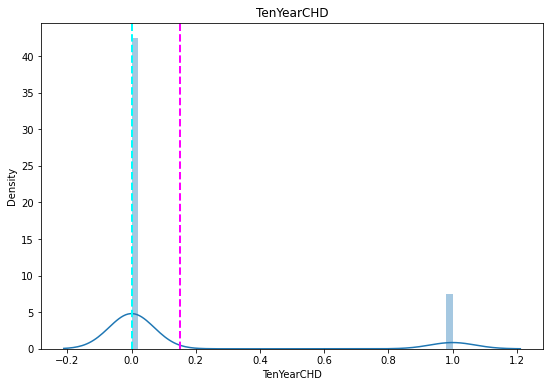

In [ ]:
# Chart - 12 visualization code
for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

Almost all columns are symmetric distributed and mean is nearly same with median for numerical columns. Here , glucose,BMI and totlcol are rightly skewed.so, we nee to transform the data for thsese features.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Just a histogram cannot define business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 14 - Correlation Heatmap

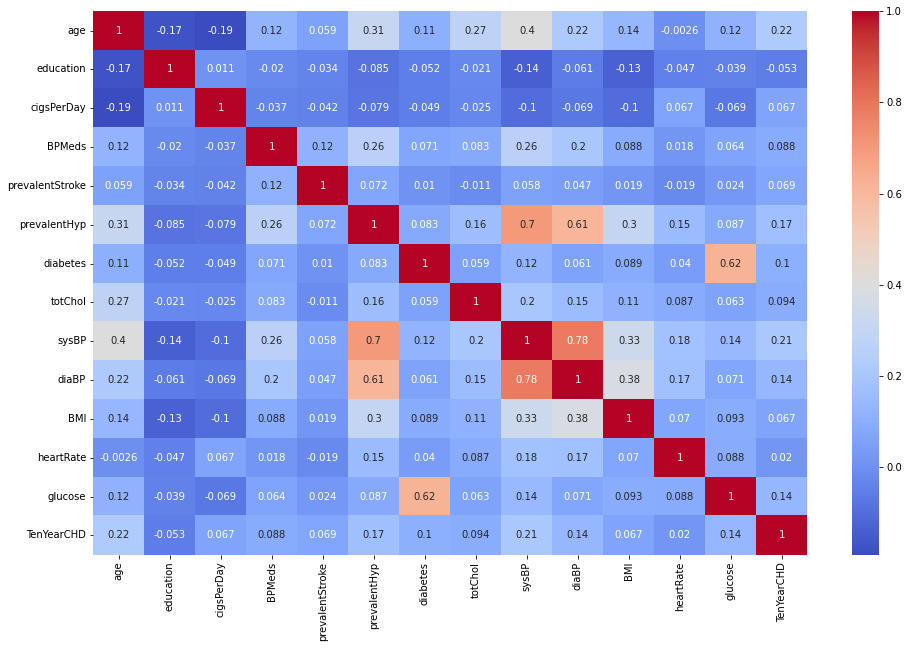

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

As seen from heatmap, we got diabetes, age, and systolic bp highly correlated with value nearer to 1 and cigperday, bpmeds,prevalentstroke and bmi slightly correlated.Education not correlated with dependent variable.

Rest all correlation can be depicted from the above chart. 

#### Chart - 15 - Pair Plot 

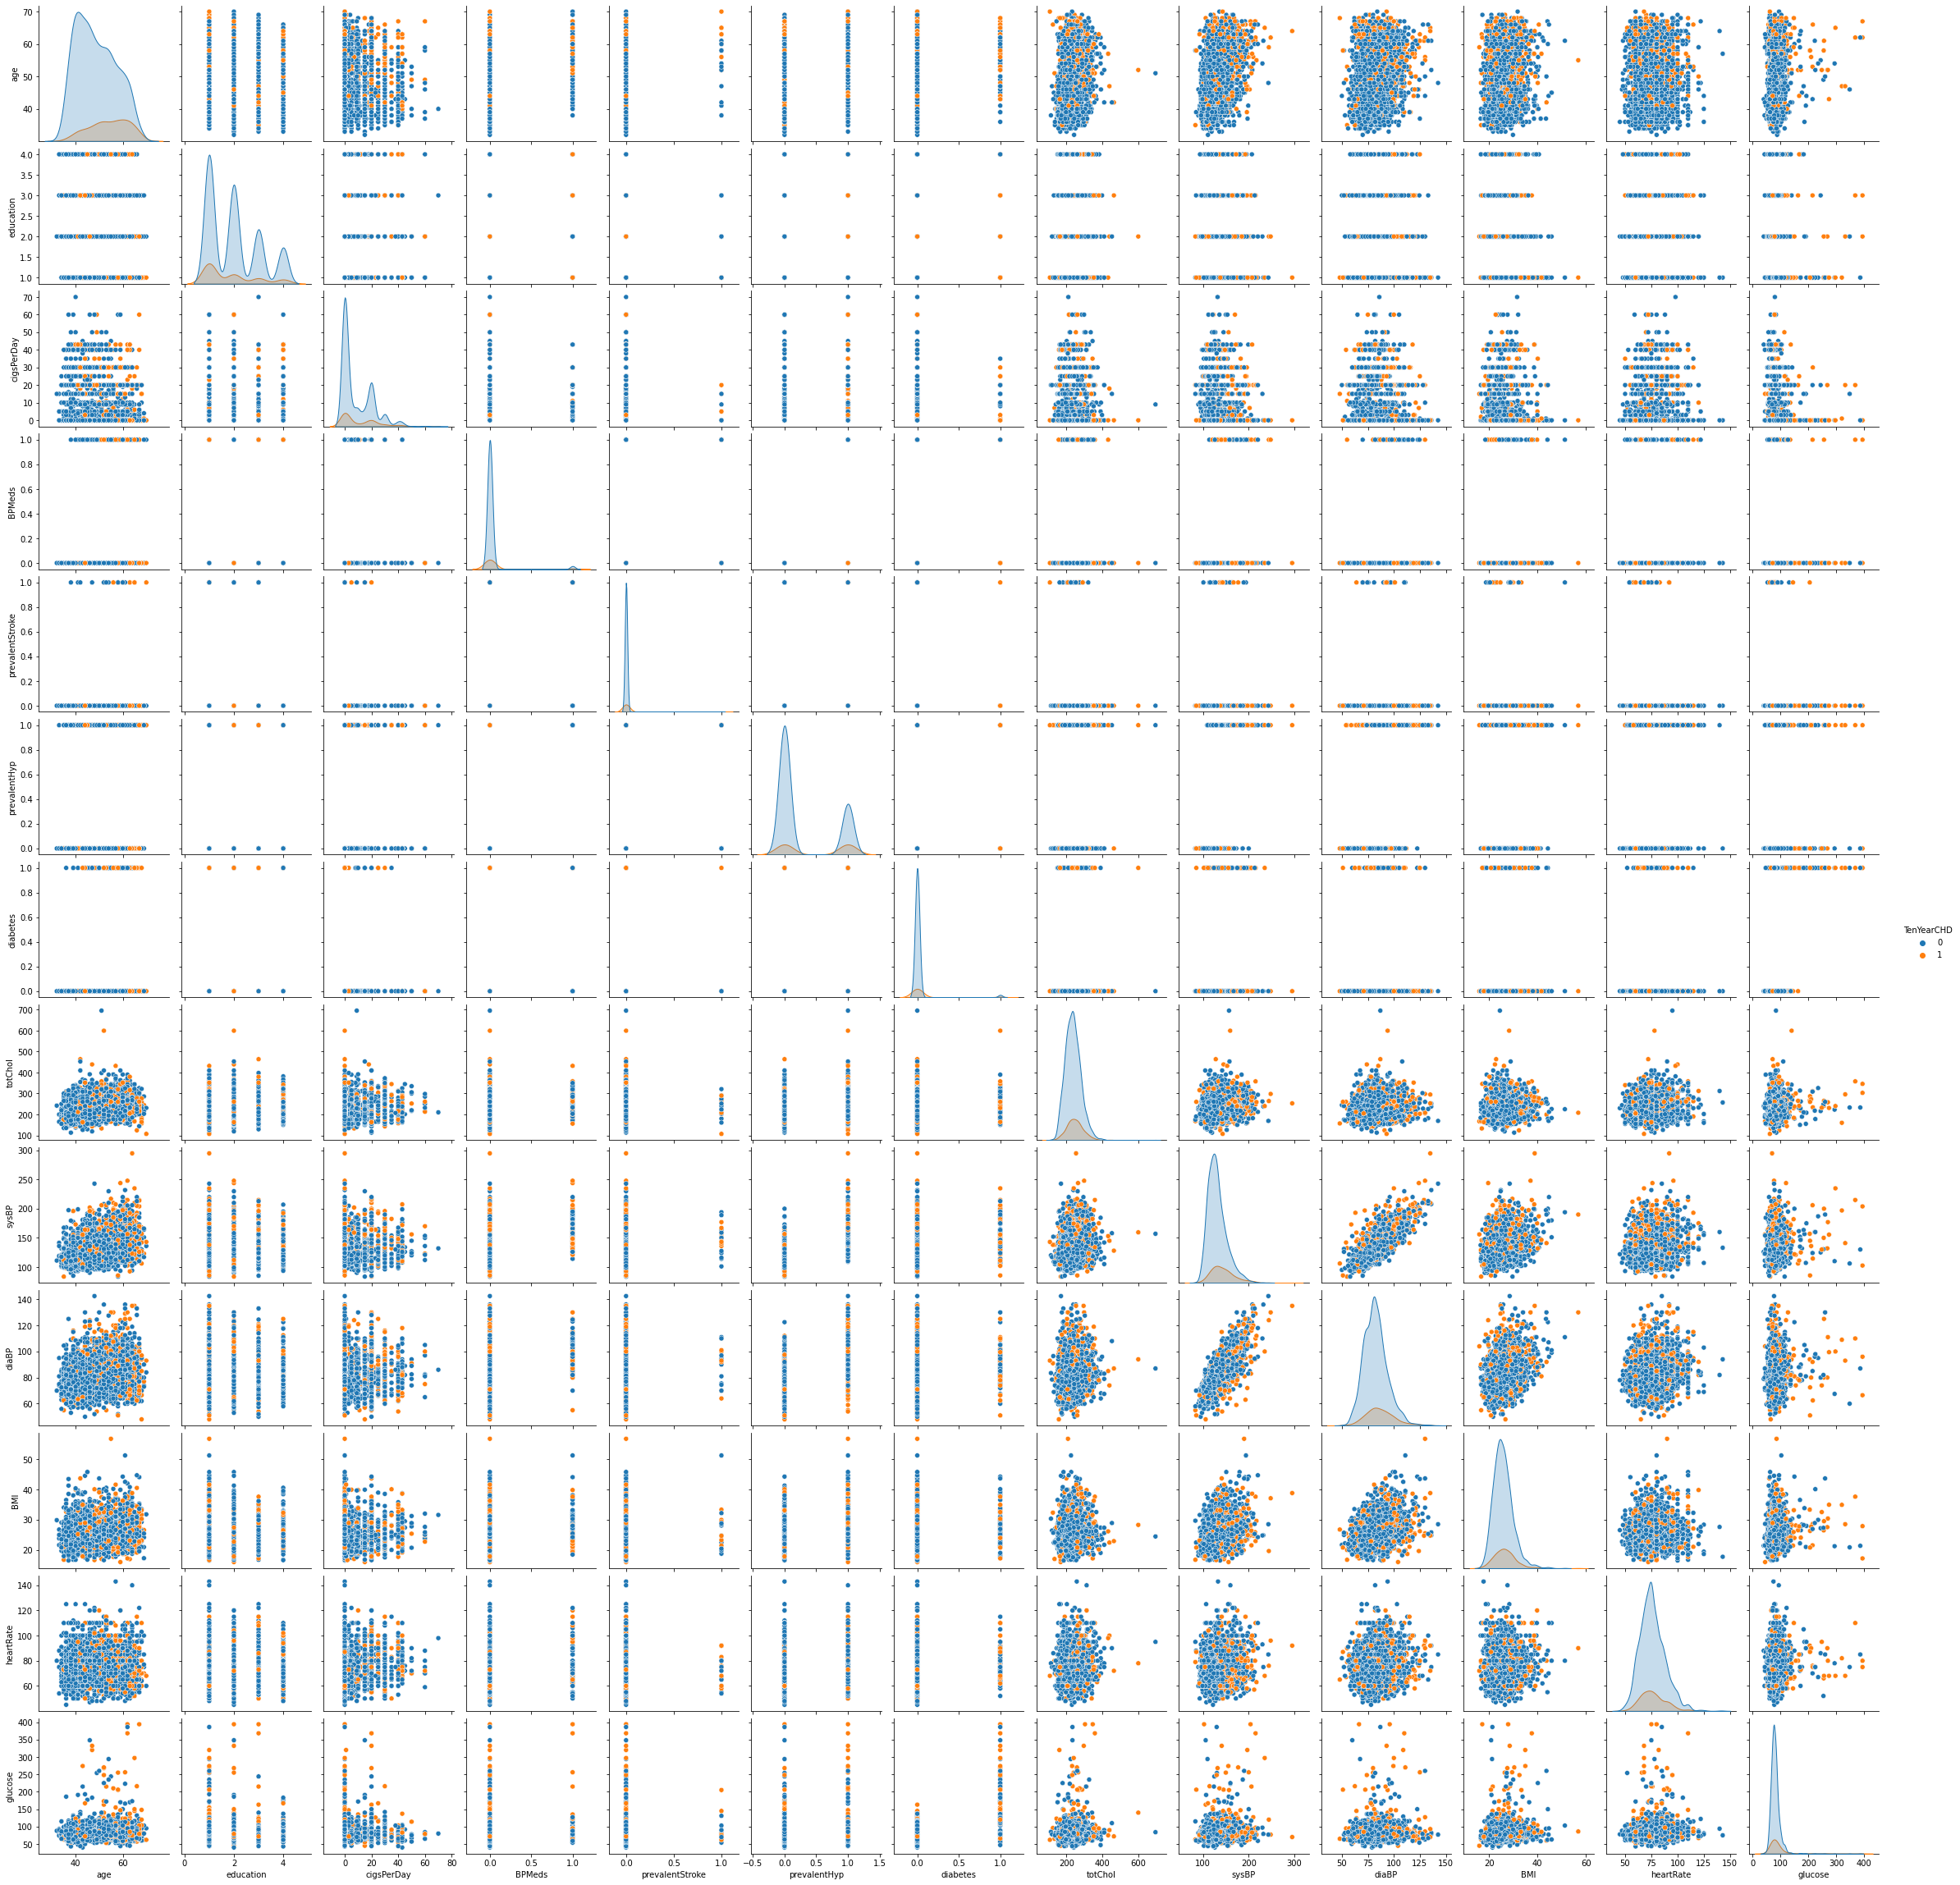

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue="TenYearCHD")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data poiunts aren't linearly separable. Churned customers data is clusetered and ovearlapped each other. Non churn data are quite symmetrical in nature and churned customer data are quite non symmetric in nature.

 In this whole pair plot, the importance of diabetes, systolicbp and age can be seen and the number of TenyearCHD with respect to different features are really insightful. Rest insights can be depicted from the above graph.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.Patients has having risk  with age have sent average of at least age of 40.

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

1.Patients has having risk with cigerets per day of average atleast 21.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 21

Alternate Hypothesis : N < 21

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

Inorder to make hypothesis testing the dataset has to contain zero null values.

In [ ]:
df['cigsPerDay'].isnull().sum() #number of null values in cigsPerDay

22

In [ ]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(0)##replacing null values with 0.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=df[(df["TenYearCHD"]==True) & (df["is_smoking"]=="YES")]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 21
sample_mean = hypo_1["cigsPerDay"].mean()
size = len(hypo_1)
std=(variance(hypo_1["cigsPerDay"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="true",hypothesis_number=hypothesis_number,df=hypo_1,col="cigsPerDay")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.30546402452914423.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Failed to reject the Null Hypothesis because as we can see patients smoking more than or equal to 21 cigsperday are more vulnerable to heart disease. So, we dont have evidence to prove that patients smoking less than 21 cigsperday are more vulnerable to disease. That's why we are getting null hypothesis is correct and we have to accept.

##### Why did you choose the specific statistical test?

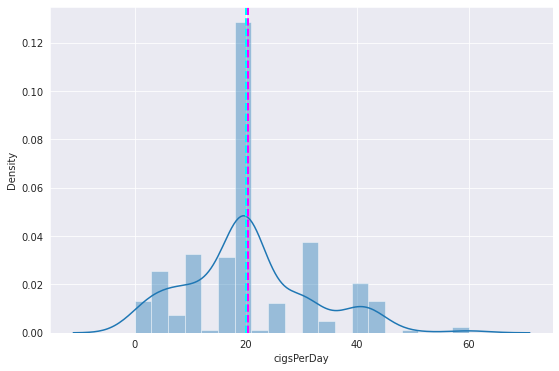

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["cigsPerDay"])
sns.distplot(hypo_1["cigsPerDay"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

## Hypothetical Statement - 2

Patients are  prone to a risk of heart disease with the BMI value atmost 25.0

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 25.0

Alternate Hypothesise : mean > 25.0

Type of Test : Right Tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
df['BMI'].isnull().sum() #number of null values in BMI

14

In [ ]:
df['BMI'] = df['BMI'].fillna(0)  ##null values are replaced with 0.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_2=df[(df["TenYearCHD"]==True)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 30
sample_mean = hypo_2["BMI"].mean()
size = len(hypo_2)
std=(variance(hypo_2["BMI"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="true",hypothesis_number=hypothesis_number,df=hypo_2,col="BMI")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 2.642392086412728e-47


##### Why did you choose the specific statistical test?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can be rejected  and patients with the BMI value of 25.0 are not prone to risk of heart disease.So, We  have proper evidence that people who are having bmi value less than 25 are not prone to heart disease. More than 25.0 BMI leads to risk of heart disease.

##### Which statistical test have you done to obtain P-Value?

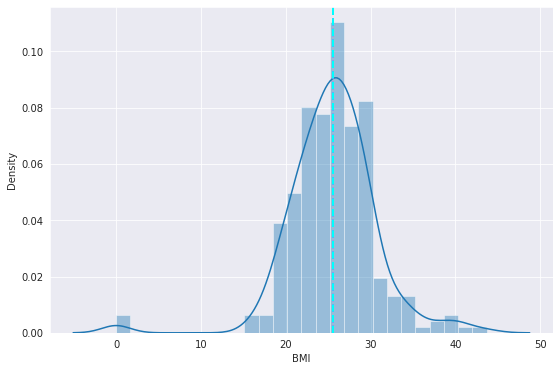

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["BMI"])
sns.distplot(hypo_1["BMI"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
mean_median_difference=hypo_1["BMI"].median()- hypo_1["BMI"].mean()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 0.007345454545454544


As shown above the Mean median difference is near to zero. Mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3

Patients has having risk with average systolic bp is 130.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : N = 130.0

Alternate Hypothesis : N != 130.0

Test Type : Two Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
df['sysBP'].isnull().sum() ## we dont have any null values present here.

0

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_3=df[(df["TenYearCHD"]==True)]
hypo_3["sysBP"]=hypo_3["sysBP"]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 150
sample_mean = hypo_3["sysBP"].mean()
size = len(hypo_3)
std=(variance(hypo_3["sysBP"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=hypo_3,col="sysBP")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 4.045220554322761e-07


##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and patients are not having risk at  130 systolic bp. So, we have evidence that people who are having systolic bp of 130 or less than that are not prone to heart disease and those who are having more than 150 or 200 are prone to disease.

##### Why did you choose the specific statistical test?

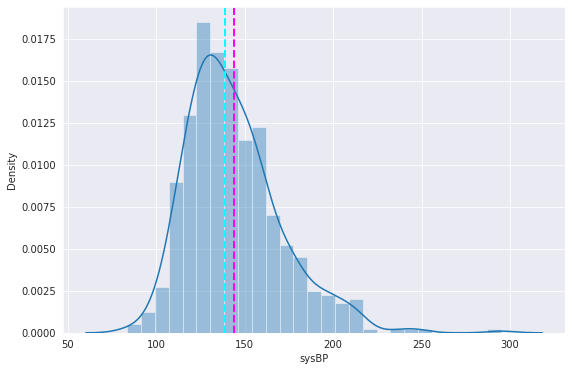

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["sysBP"])
sns.distplot(hypo_3["sysBP"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

From the above chart wecan see the distribution is postively or rightly  skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [8]:
# Creating a copy of the dataset for further feature engineering
final_df=df.copy()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


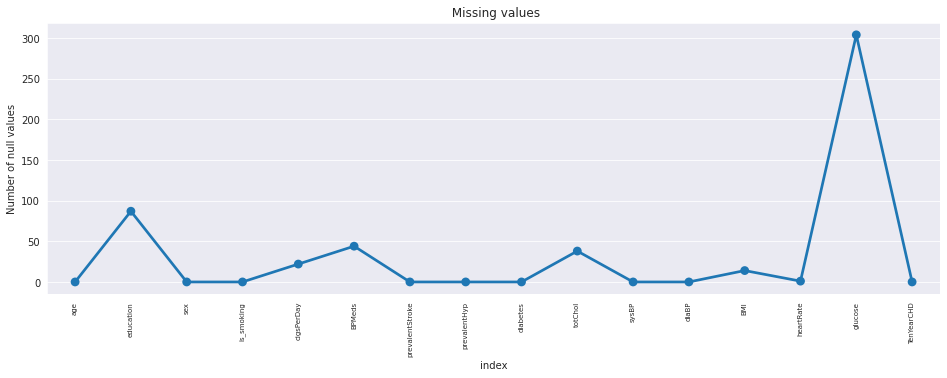

In [9]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(final_df.isnull().sum())

# Visualizing the missing values
missing = pd.DataFrame(final_df.isnull().sum()).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title(" Missing values")
plt.ylabel("Number of null values")
plt.show()

In [10]:
final_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [11]:
final_df['heartRate'] = final_df['heartRate'].fillna(0.0)##replacing null values with 0.beacuse heart rate null value number is only one so we can replace.
final_df['BPMeds'] = final_df['BPMeds'].fillna(0.0)#only two values are there 0 and 1 so, replace with the zero.

In [12]:
##for education mean value is 2.0 and maximum value is 4.0 so we can replace with mean
final_df['education'].fillna(final_df['education'].mean(), inplace = True)

##cigsPerDay is replaced with the mean 
final_df['cigsPerDay'].fillna(final_df['cigsPerDay'].mean(), inplace = True)


#total chol null values are replace with median
final_df['totChol'].fillna(final_df['totChol'].median(), inplace = True)

#BMI null values are replace with median
final_df['BMI'].fillna(final_df['BMI'].median(), inplace = True)

#glucose values are replace with median
final_df['glucose'].fillna(final_df['glucose'].median(), inplace = True)


In [13]:
final_df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

No Null values found now.

#### What all missing value imputation techniques have you used and why did you use those techniques?

For heart rate and BP meds the number of null values are less. So, we can fill those values with zero.For education and cigsperday we got many number of null values so we can replace with the mean and totalchol, BMI, glucose having some outliers so mean cannot be the perfect choice, Instead we can fill by median.

### 2. Handling Outliers

In [14]:
#splitting numerical features and categorical features
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
print(f'numerical features are :- {numerical_features}')
categorical_features = ['education', 'sex', 'is_smoking']
print(f'categorical features are :- {categorical_features}')

numerical features are :- ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical features are :- ['education', 'sex', 'is_smoking']


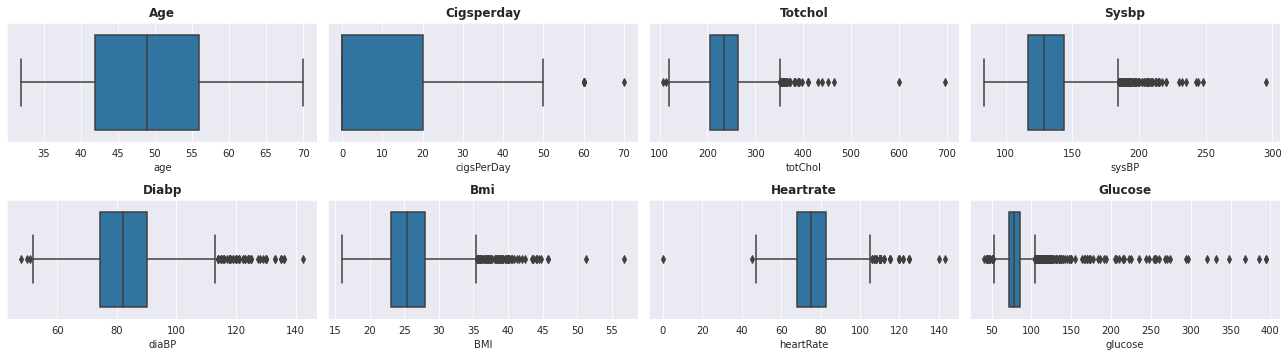

In [15]:
# Handling Outliers & Outlier treatments
# Visualization is the easiest way to have an inference about the overall data and the outliers.
plt.figure(figsize=(18,12))
for n,column in enumerate(numerical_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(final_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [16]:
# Removing outliers by standard methods and Plotting graphs:
final_new_df = final_df.copy()
for col in numerical_features:
  # Using IQR method to define the range of inliners:
  q1, q3, median = final_new_df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  final_new_df[col] = np.where(final_new_df[col] > upper_limit, median,np.where(
                         final_new_df[col] < lower_limit,median,final_new_df[col]))

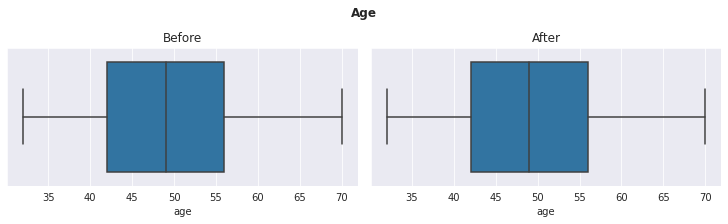

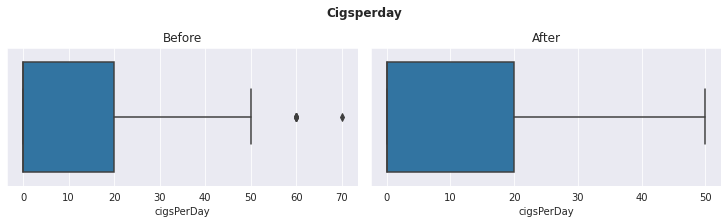

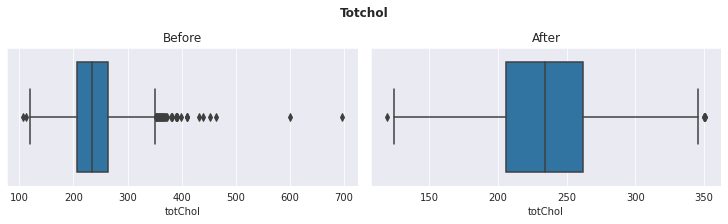

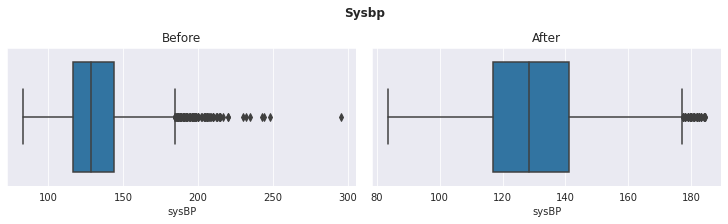

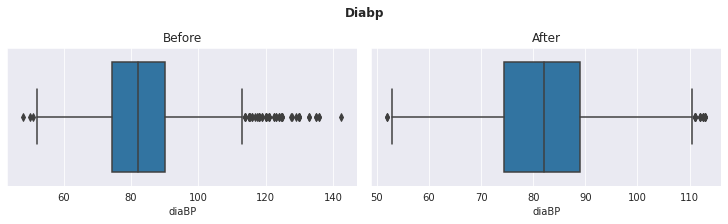

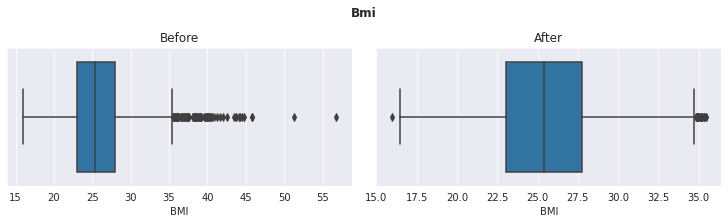

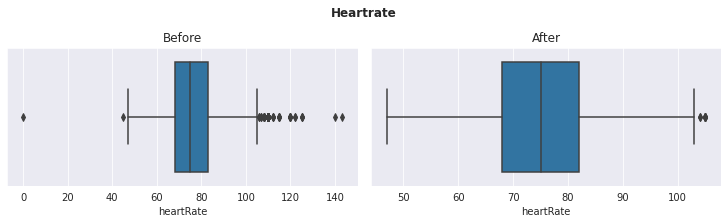

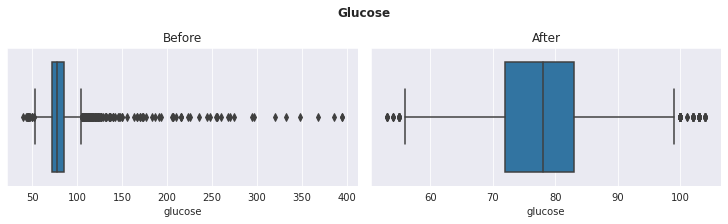

In [17]:
# Plotting Graphs Before treating outliers 
for col in numerical_features:
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(10, 3)
  sns.boxplot(final_df[col], ax=ax[0]).set(title="Before")
  # After treating outliers
  sns.boxplot(final_new_df[col], ax=ax[1]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

lower inner fence: Q1–1.5*IQ

upper inner fence: Q3 + 1.5*IQ

lower outer fence: Q1–3*IQ

upper outer fence: Q3 + 3*IQ

So, I used boxplot for replacing Outliers with median value because mean cannot be the good choice as some values are extreme and they will increase the mean.

Another way to do it is dropping extreme values but I didn't do that due to less no. of datapoints I have.

### 3. Categorical Encoding

In [18]:
final_new_df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64.0,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36.0,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60.0,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46.0,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44.0,3.0,M,YES,3.0,0.0,0,1,0,234.0,164.0,82.0,28.92,73.0,72.0,1


In [19]:
# Getting dictionaries for Label Encoding
dict1={"M":1,"F":0}
dict2={"YES":1,"NO":0}
education_list=sorted(list(final_new_df["education"].unique()))
dict3=dict(zip(education_list,range(0,len(education_list))))

In [20]:
# Label Encoding in the dataset
# final_new_df['TenYearCHD']=final_new_df['TenYearCHD'].map(dict1)
final_new_df['sex']=final_new_df['sex'].map(dict1)
final_new_df['is_smoking']=final_new_df['is_smoking'].map(dict2)
final_new_df['education']=final_new_df['education'].map(dict3)

In [21]:
# Checking Whether all features are numeric or not
len(final_new_df.columns) == len(final_new_df.describe().columns)

True

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot Encoding technique for sex,education,is_smoking columns.Beacuse for education data points lies on the 1.0 to 4.0 and for rest of the columns are like yes or no and male or female so, it's easy to create dummies for those variables. We can also use label encoding for these columns.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [22]:
# Expand Contraction

#### 2. Lower Casing

In [23]:
# Lower Casing

#### 3. Removing Punctuations

In [24]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [25]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [26]:
# Remove Stopwords

In [27]:
# Remove White spaces

#### 6. Rephrase Text

In [28]:
# Rephrase Text

#### 7. Tokenization

In [29]:
# Tokenization

#### 8. Text Normalization

In [30]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [31]:
# POS Taging

#### 10. Text Vectorization

In [32]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.

In [33]:
#function to make new column as hypertension
def blood_presure_classification(sysBP, diaBP):
  if (sysBP < 90) or (diaBP < 60):
    return 0 # 'Hypotension'
  if (sysBP < 120) and (diaBP < 80):
    return 1 # 'Optimal'
  if (sysBP < 130) or (diaBP < 86):
    return 2 # 'Normal'
  if (sysBP < 140) or (diaBP < 90):
    return 3 # 'PreHypertensive'
  if (sysBP > 140) and (diaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (sysBP < 160) or (diaBP < 100):
    return 5 # 'GradeI'
  if (sysBP < 180) or (diaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [34]:
final_new_df['Hypertension'] = final_new_df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
final_new_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
id,,,,,,,,,,,,,,,,,
0,64.0,2,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,2
1,36.0,4,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,46.0,0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,50.0,0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,64.0,0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2


In [35]:
# remove the previous columns like sysbp, diabp
final_new_df.drop(columns=['sysBP', 'diaBP'], inplace=True)

Created one new feature like Hypertension and dropped the sysbp and diabp.

#### 2. Feature Selection

In [36]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [37]:
# Checking VIF for each variable
independent_variables = [i for i in final_new_df.columns if i not in ['TenYearCHD']]
calc_vif(final_new_df[independent_variables])

,variables,VIF
0,age,38.696985
1,education,2.190849
2,sex,2.130275
3,is_smoking,5.082692
4,cigsPerDay,4.336637
5,BPMeds,1.127693
6,prevalentStroke,1.026909
7,prevalentHyp,2.442053
8,diabetes,1.047104
9,totChol,36.614824


In [38]:
# glucose,BMI,totChol  are highly correlated. Hence removing them
independent_variables = [i for i in final_new_df.columns if i not in ['TenYearCHD','glucose',
                                                            'BMI','totChol']]
calc_vif(final_new_df[independent_variables])

,variables,VIF
0,age,22.977893
1,education,2.119427
2,sex,1.988943
3,is_smoking,5.048924
4,cigsPerDay,4.316212
5,BPMeds,1.124879
6,prevalentStroke,1.026235
7,prevalentHyp,2.415904
8,diabetes,1.045400
9,heartRate,25.150828


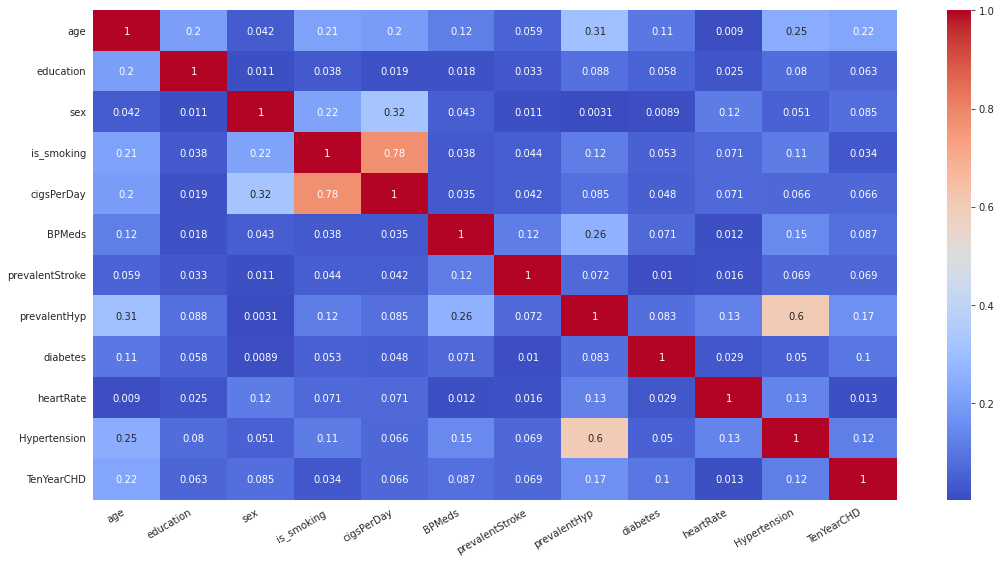

In [39]:
# Updating the dataset
df_cvs = final_new_df[independent_variables + ['TenYearCHD']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df_cvs.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [40]:
# Checking top 5 rows of the cleaned dataset
df_cvs.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,heartRate,Hypertension,TenYearCHD
id,,,,,,,,,,,,
0,64.0,2,0,1,3.0,0.0,0,0,0,90.0,2,1
1,36.0,4,1,0,0.0,0.0,0,1,0,72.0,5,0
2,46.0,0,0,1,10.0,0.0,0,0,0,88.0,1,0
3,50.0,0,1,1,20.0,0.0,0,1,0,68.0,3,1
4,64.0,0,0,1,30.0,0.0,0,0,0,70.0,2,0


##### What all feature selection methods have you used  and why?

I used VIF tecnique to remove hihly correlated features. VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables. Feature, Dropping columns having multicolinearity and validate through VIF.

We can see some highly correlated features. So, I  treated them by excluding them from dataset and checked the variance inflation factors.

##### Which all features you found important and why?

In [41]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  finaldf= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  finaldf.set_index('Importances')
  # Sort in ascending order to better visualization
  finaldf= finaldf.sort_values('Importances')
  # Plot the feature importances in bars
  # finaldf.plot.bar(color='teal')
  return finaldf

In [42]:
# Getting feature importance of selected features
randomforest_embedded(x=df_cvs.drop(["TenYearCHD"],axis=1),y=df_cvs["TenYearCHD"])

,Features,Importances
6,prevalentStroke,0.007772
5,BPMeds,0.013418
3,is_smoking,0.016339
8,diabetes,0.017017
7,prevalentHyp,0.029043
2,sex,0.032179
1,education,0.091031
10,Hypertension,0.096089
4,cigsPerDay,0.108681
9,heartRate,0.289308


Finally I found out 10 indepenedent features which are important and validate their importances through Embedded method using random forest classifier feature importance. All the features which i left with having some importances and none of them are 0. So, It validates the features make sense and heading towards the right direction.

### 5. Data Transformation
**As for the obtained dataset data transformation is not required because all the features are symmetric in nature so,skipping this part**

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [43]:
# Transform Your data

### 6. Data Scaling

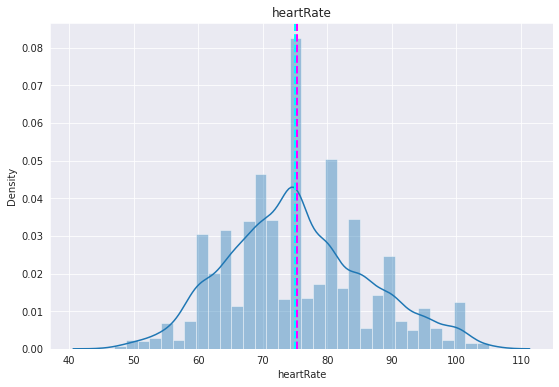

In [44]:
# Scaling your data
# Visualizing code of hist plot for each columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (df_cvs["heartRate"])
sns.distplot(df_cvs["heartRate"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("heartRate")
plt.show()

In [45]:
# Standardizing the required column
df_cvs["heartRate"] = StandardScaler().fit_transform(df_cvs["heartRate"].values.reshape(-1, 1))

In [46]:
# Checking the dataset
df_cvs.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,heartRate,Hypertension,TenYearCHD
id,,,,,,,,,,,,
0,64.0,2,0,1,3.0,0.0,0,0,0,1.364775,2,1
1,36.0,4,1,0,0.0,0.0,0,1,0,-0.304368,5,0
2,46.0,0,0,1,10.0,0.0,0,0,0,1.179315,1,0
3,50.0,0,1,1,20.0,0.0,0,1,0,-0.675289,3,1
4,64.0,0,0,1,30.0,0.0,0,0,0,-0.489829,2,0


##### Which method have you used to scale you data and why?

When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

So, Here heart rate ranges from -2.6 to 2.7
Use Standardization when your data follows Gaussian distribution. Use Normalization when your data does not follow Gaussian distribution.

So, in my data only heartrate column having large data difference and following gaussian distribution. That's why, I have used standardization using atandardscaler.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**For our dataset Dimesionality reduction is not required because our data is not much large and for large dataset building a model is very expensive so, this part is essentially required for large dataset if million of rows are present.**

In [47]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [95]:
# Split your data to train and test. Choose Splitting ratio wisely.
# split into 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(df_cvs.drop("TenYearCHD",axis=1),df_cvs["TenYearCHD"], test_size = 0.3, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (2373, 11)
Number transactions y_train dataset:  (2373,)
Number transactions X_test dataset:  (1017, 11)
Number transactions y_test dataset:  (1017,)


##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, our parameter estimates have greater variance. With less testing data, our performance statistic will have greater variance. Broadly speaking we should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If we have a total of 100 instances, we're probably stuck with cross validation as no single split is going to give you satisfactory variance in our estimates. If we have 100,000 instances, it doesn't really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data if our method is particularly computationally intensive).

Taking 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if we use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

### 9. Handling Imbalanced Dataset

0    2879
1     511
Name: TenYearCHD, dtype: int64
 


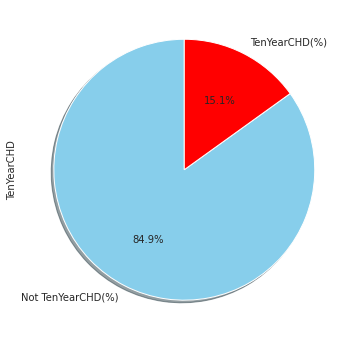

In [49]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df.TenYearCHD.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not TenYearCHD(%)','TenYearCHD(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 85:15. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [96]:
# Handling class imbalance by oversampling followed by removing the Tomek link
from imblearn.combine import SMOTETomek
x_train, y_train = SMOTETomek(random_state=42).fit_resample(X_train, Y_train)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[Y_train,"Before"],[y_train,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2017
1     356
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    1976
1    1976
Name: TenYearCHD, dtype: int64 



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 85:15 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.

## ***7. ML Model Implementation***

### ML Model - 1

In [51]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(x_train, y_train)

# Predict on the model

LogisticRegression(max_iter=10000)

In [52]:
# Checking the coefficients
clf.coef_

array([[ 3.25383927, -0.19528333,  0.46924656,  0.19508795,  0.86017331,
        -0.11496112,  0.75814322,  0.56640695,  0.61649003, -0.30016307,
         0.27413618]])

In [53]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(x_train)
test_preds = clf.predict_proba(X_test)

In [54]:
# Get the predicted classes
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(X_test)

In [55]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6877256317689531
The accuracy on test data is  0.6371681415929203


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1295  644]
 [ 567 1372]]


[Text(0, 0.5, 'Not TenYearCHD'), Text(0, 1.5, 'TenYearCHD')]

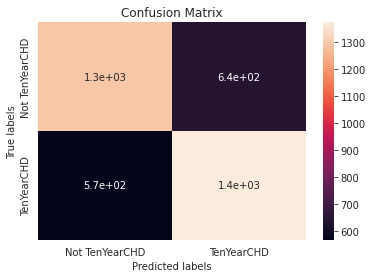

In [60]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['Not TenYearCHD', 'TenYearCHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


[[548 314]
 [ 55 100]]


[Text(0, 0.5, 'Not TenYearCHD'), Text(0, 1.5, 'TenYearCHD')]

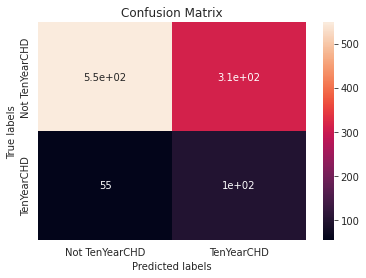

In [61]:
#for testing test
labels = ['Not TenYearCHD', 'TenYearCHD']
cm = confusion_matrix(Y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [62]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1862
           1       0.71      0.68      0.69      2016

    accuracy                           0.69      3878
   macro avg       0.69      0.69      0.69      3878
weighted avg       0.69      0.69      0.69      3878

 
roc_auc_score
0.687725631768953


In [63]:
print(metrics.classification_report(test_class_preds, Y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.64      0.91      0.75       603
           1       0.65      0.24      0.35       414

    accuracy                           0.64      1017
   macro avg       0.64      0.58      0.55      1017
weighted avg       0.64      0.64      0.59      1017

 
roc_auc_score
0.6404460743956291


I used Logistic regression algorithm to create the model. As I got not so good result.

For training dataset, i found precision of 67% and recall of 70% and f1-score of 68% for False TenYearCHD data. BUt, I am also interested to see the result for TenYearCHD result as I got precision of 71% and recall of 68% and f1-score of 69%. Accuracy is 69% and average percision, recall & f1_score are 69%, 69% and 69% respectively with a roc auc score of 68%.

For testing dataset, i found precision of 64% and recall of 91% and f1-score of 75% for False TenYearCHD data. BUt, I am also interested to see the result for TenYearCHD result as I got precision of 65% and recall of 24% and f1-score of 35%. Accuracy is 64% and average percision, recall & f1_score are 64%, 58% and 55% respectively with a roc auc score of 64%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(x_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.696280 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [65]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1863
           1       0.71      0.68      0.70      2015

    accuracy                           0.69      3878
   macro avg       0.69      0.69      0.69      3878
weighted avg       0.69      0.69      0.69      3878

 
roc_auc_score
0.6910778751933987


In [66]:
print(metrics.classification_report(test_class_preds, Y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.64      0.92      0.75       603
           1       0.67      0.25      0.37       414

    accuracy                           0.65      1017
   macro avg       0.66      0.58      0.56      1017
weighted avg       0.65      0.65      0.60      1017

 
roc_auc_score
0.65566948581693


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By using GridsearCV we got below results .

For training dataset, i found precision of 67% and recall of 70% and f1-score of 68% for False TenYearCHD data. BUt, I am also interested to see the result for TenYearCHD result as I got precision of 71% and recall of 68% and f1-score of 70%. Accuracy is 69% and average percision, recall & f1_score are 69%, 69% and 69% respectively with a roc auc score of 69%.

For testing dataset, i found precision of 64% and recall of 92% and f1-score of 75% for False TenYearCHD data. BUt, I am also interested to see the result for TenYearCHD result as I got precision of 67% and recall of 25% and f1-score of 37%. Accuracy is 65% and average percision, recall & f1_score are 66%, 58% and 56% respectively with a roc auc score of 65%.

Quite improvemnt seen in accuracy and  roc auc of 1% but 1% decrement in recall.

### ML Model - 2 **Implementing Random Forest Classifier**

In [91]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(x_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(x_train)
test_class_preds = rf_model.predict(X_test)

In [81]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9976792160907685
The accuracy on test dataset is 0.7807276302851525


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1936    3]
 [   6 1933]]


[Text(0, 0.5, 'Not TenYearCHD'), Text(0, 1.5, 'TenYearCHD')]

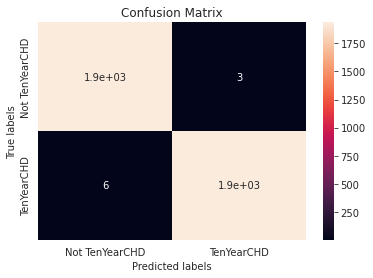

In [82]:
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Not TenYearCHD', 'TenYearCHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[757 105]
 [118  37]]


[Text(0, 0.5, 'Not TenYearCHD'), Text(0, 1.5, 'TenYearCHD')]

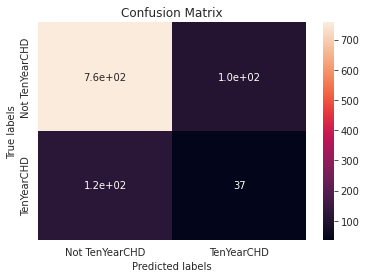

In [83]:
# Get the confusion matrix for both train and test

labels = ['Not TenYearCHD', 'TenYearCHD']
cm = confusion_matrix(Y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [84]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1942
           1       1.00      1.00      1.00      1936

    accuracy                           1.00      3878
   macro avg       1.00      1.00      1.00      3878
weighted avg       1.00      1.00      1.00      3878

 
roc_auc_score
0.9976792160907685


In [85]:
print(metrics.classification_report(test_class_preds, Y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       875
           1       0.24      0.26      0.25       142

    accuracy                           0.78      1017
   macro avg       0.56      0.56      0.56      1017
weighted avg       0.79      0.78      0.78      1017

 
roc_auc_score
0.5584499663198862


Then, I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for False TenYearCHD data. BUt, I am also interested to see the result for TenYearCHD result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 99.7%.

For testing dataset, i found precision of 88% and recall of 87% and f1-score of 87% for False TenYearCHD data. BUt, I am also interested to see the result for TenYearCHD result as I got precision of 24% and recall of 26% and f1-score of 25%. Accuracy is 78% and average percision, recall & f1_score are 56%, 56% and 56% respectively with a roc auc score of 55%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(x_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(x_train)
test_class_preds = rf_grid.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

In [87]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.751912 using {'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [88]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1815
           1       0.81      0.76      0.78      2063

    accuracy                           0.77      3878
   macro avg       0.77      0.77      0.77      3878
weighted avg       0.78      0.77      0.77      3878

 
roc_auc_score
0.7735946364105208


In [89]:
print(metrics.classification_report(test_class_preds, Y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       675
           1       0.56      0.25      0.35       342

    accuracy                           0.68      1017
   macro avg       0.63      0.58      0.57      1017
weighted avg       0.66      0.68      0.64      1017

 
roc_auc_score
0.6327333283436868


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 74% and recall of 79% and f1-score of 77% for False TenYearCHD data. BUt, I am also interested to see the result for TenYearCHD result as I got precision of 81% and recall of 76% and f1-score of 78%. Accuracy is 77% and average percision, recall & f1_score are 77%, 77% and 77% respectively with a roc auc score of 77%.

Quite improvment seen as no overfitting but the scores reduced by some percentages.

For testing dataset, i found precision of 70% and recall of 90% and f1-score of 79% for False TenYearCHD data. BUt, I am also interested to see the result for TenYearCHD esult as I got precision of 56% and recall of 25% and f1-score of 35%. Accuracy is 68% and average percision, recall & f1_score are 63%, 58% and 57% respectively with a roc auc score of 63%.

Quite improvemnt seen in recall but rest scores have decreased.

In [97]:
##seeing important features
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [98]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,age,0.30
9,heartRate,0.21
10,Hypertension,0.17
4,cigsPerDay,0.11
1,education,0.10
7,prevalentHyp,0.04
2,sex,0.03
3,is_smoking,0.02
5,BPMeds,0.01
8,diabetes,0.01


In [99]:
features = x_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

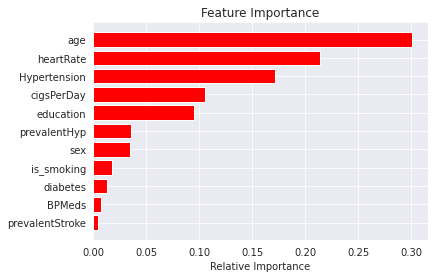

In [100]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3  **Implementing XgBoost Classifier**

In [101]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(x_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(x_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1612  364]
 [ 277 1699]]


[Text(0, 0.5, 'Not TenYearCHD'), Text(0, 1.5, 'TenYearCHD')]

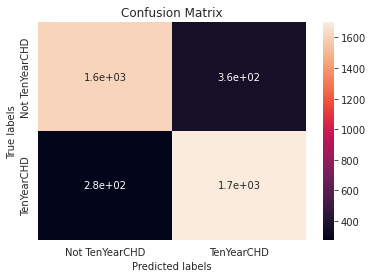

In [102]:
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Not TenYearCHD', 'TenYearCHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[682 180]
 [102  53]]


[Text(0, 0.5, 'Not TenYearCHD'), Text(0, 1.5, 'TenYearCHD')]

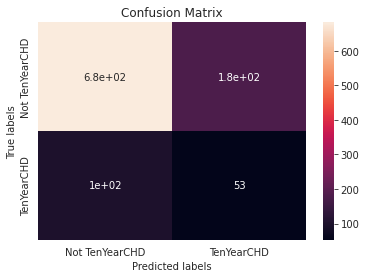

In [103]:
# Get the confusion matrix for both train and test

labels = ['Not TenYearCHD', 'TenYearCHD']
cm = confusion_matrix(Y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [104]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1889
           1       0.86      0.82      0.84      2063

    accuracy                           0.84      3952
   macro avg       0.84      0.84      0.84      3952
weighted avg       0.84      0.84      0.84      3952

 
roc_auc_score
0.8378036437246964


In [105]:
print(metrics.classification_report(test_class_preds, Y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       784
           1       0.34      0.23      0.27       233

    accuracy                           0.72      1017
   macro avg       0.57      0.55      0.55      1017
weighted avg       0.69      0.72      0.70      1017

 
roc_auc_score
0.5665593892672703


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***